In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset

In [2]:
resume_data = pd.read_csv('../data/resume.csv')

In [3]:
resume_data

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [10]:
# drop null
resume_data.isnull().sum()
resume_data_drop_null = resume_data.drop(['job_ad_id',
                                          'job_fed_contractor',
                                          'job_req_min_experience'],
                                         axis=1)

In [12]:
# check data one more time
resume_data_drop_null.isnull().sum()

job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [13]:
# dividing columns into categorical and numerical list
categorical = []
numerical = []

In [14]:
for column in resume_data_drop_null.columns:
    if resume_data_drop_null[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

In [15]:
categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_school',
 'firstname',
 'race',
 'gender',
 'resume_quality']

In [16]:
numerical

['job_equal_opp_employer',
 'job_req_any',
 'job_req_communication',
 'job_req_education',
 'job_req_computer',
 'job_req_organization',
 'received_callback',
 'years_college',
 'college_degree',
 'honors',
 'worked_during_school',
 'years_experience',
 'computer_skills',
 'special_skills',
 'volunteer',
 'military',
 'employment_holes',
 'has_email_address']

## Encoding data for training

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# initialize label encoder
LabelEncoder = LabelEncoder()

In [20]:
# if columns has less than 3 unique categorical values
# then label encoding, else frequency encoding will be performed
for column in categorical:
    if len(resume_data_drop_null[column].unique()) <= 3:
        resume_data_drop_null[column] = LabelEncoder.fit_transform(resume_data_drop_null[column])
    else:
        freq_encoding = resume_data_drop_null[column].value_counts(normalize=True).to_dict()
        resume_data_drop_null[column] = resume_data_drop_null[column].map(freq_encoding)

In [21]:
resume_data_drop_null.head()

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,0,0,0,1,0,1
1,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,1,1,0,1,0
2,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,0,0,0,0,1
3,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,1,1,0,1,1,0
4,1,0.319918,0.332854,1,0.065298,1,0,0,1,1,...,0,1,22,1,0,0,0,0,1,0


## Visualize data

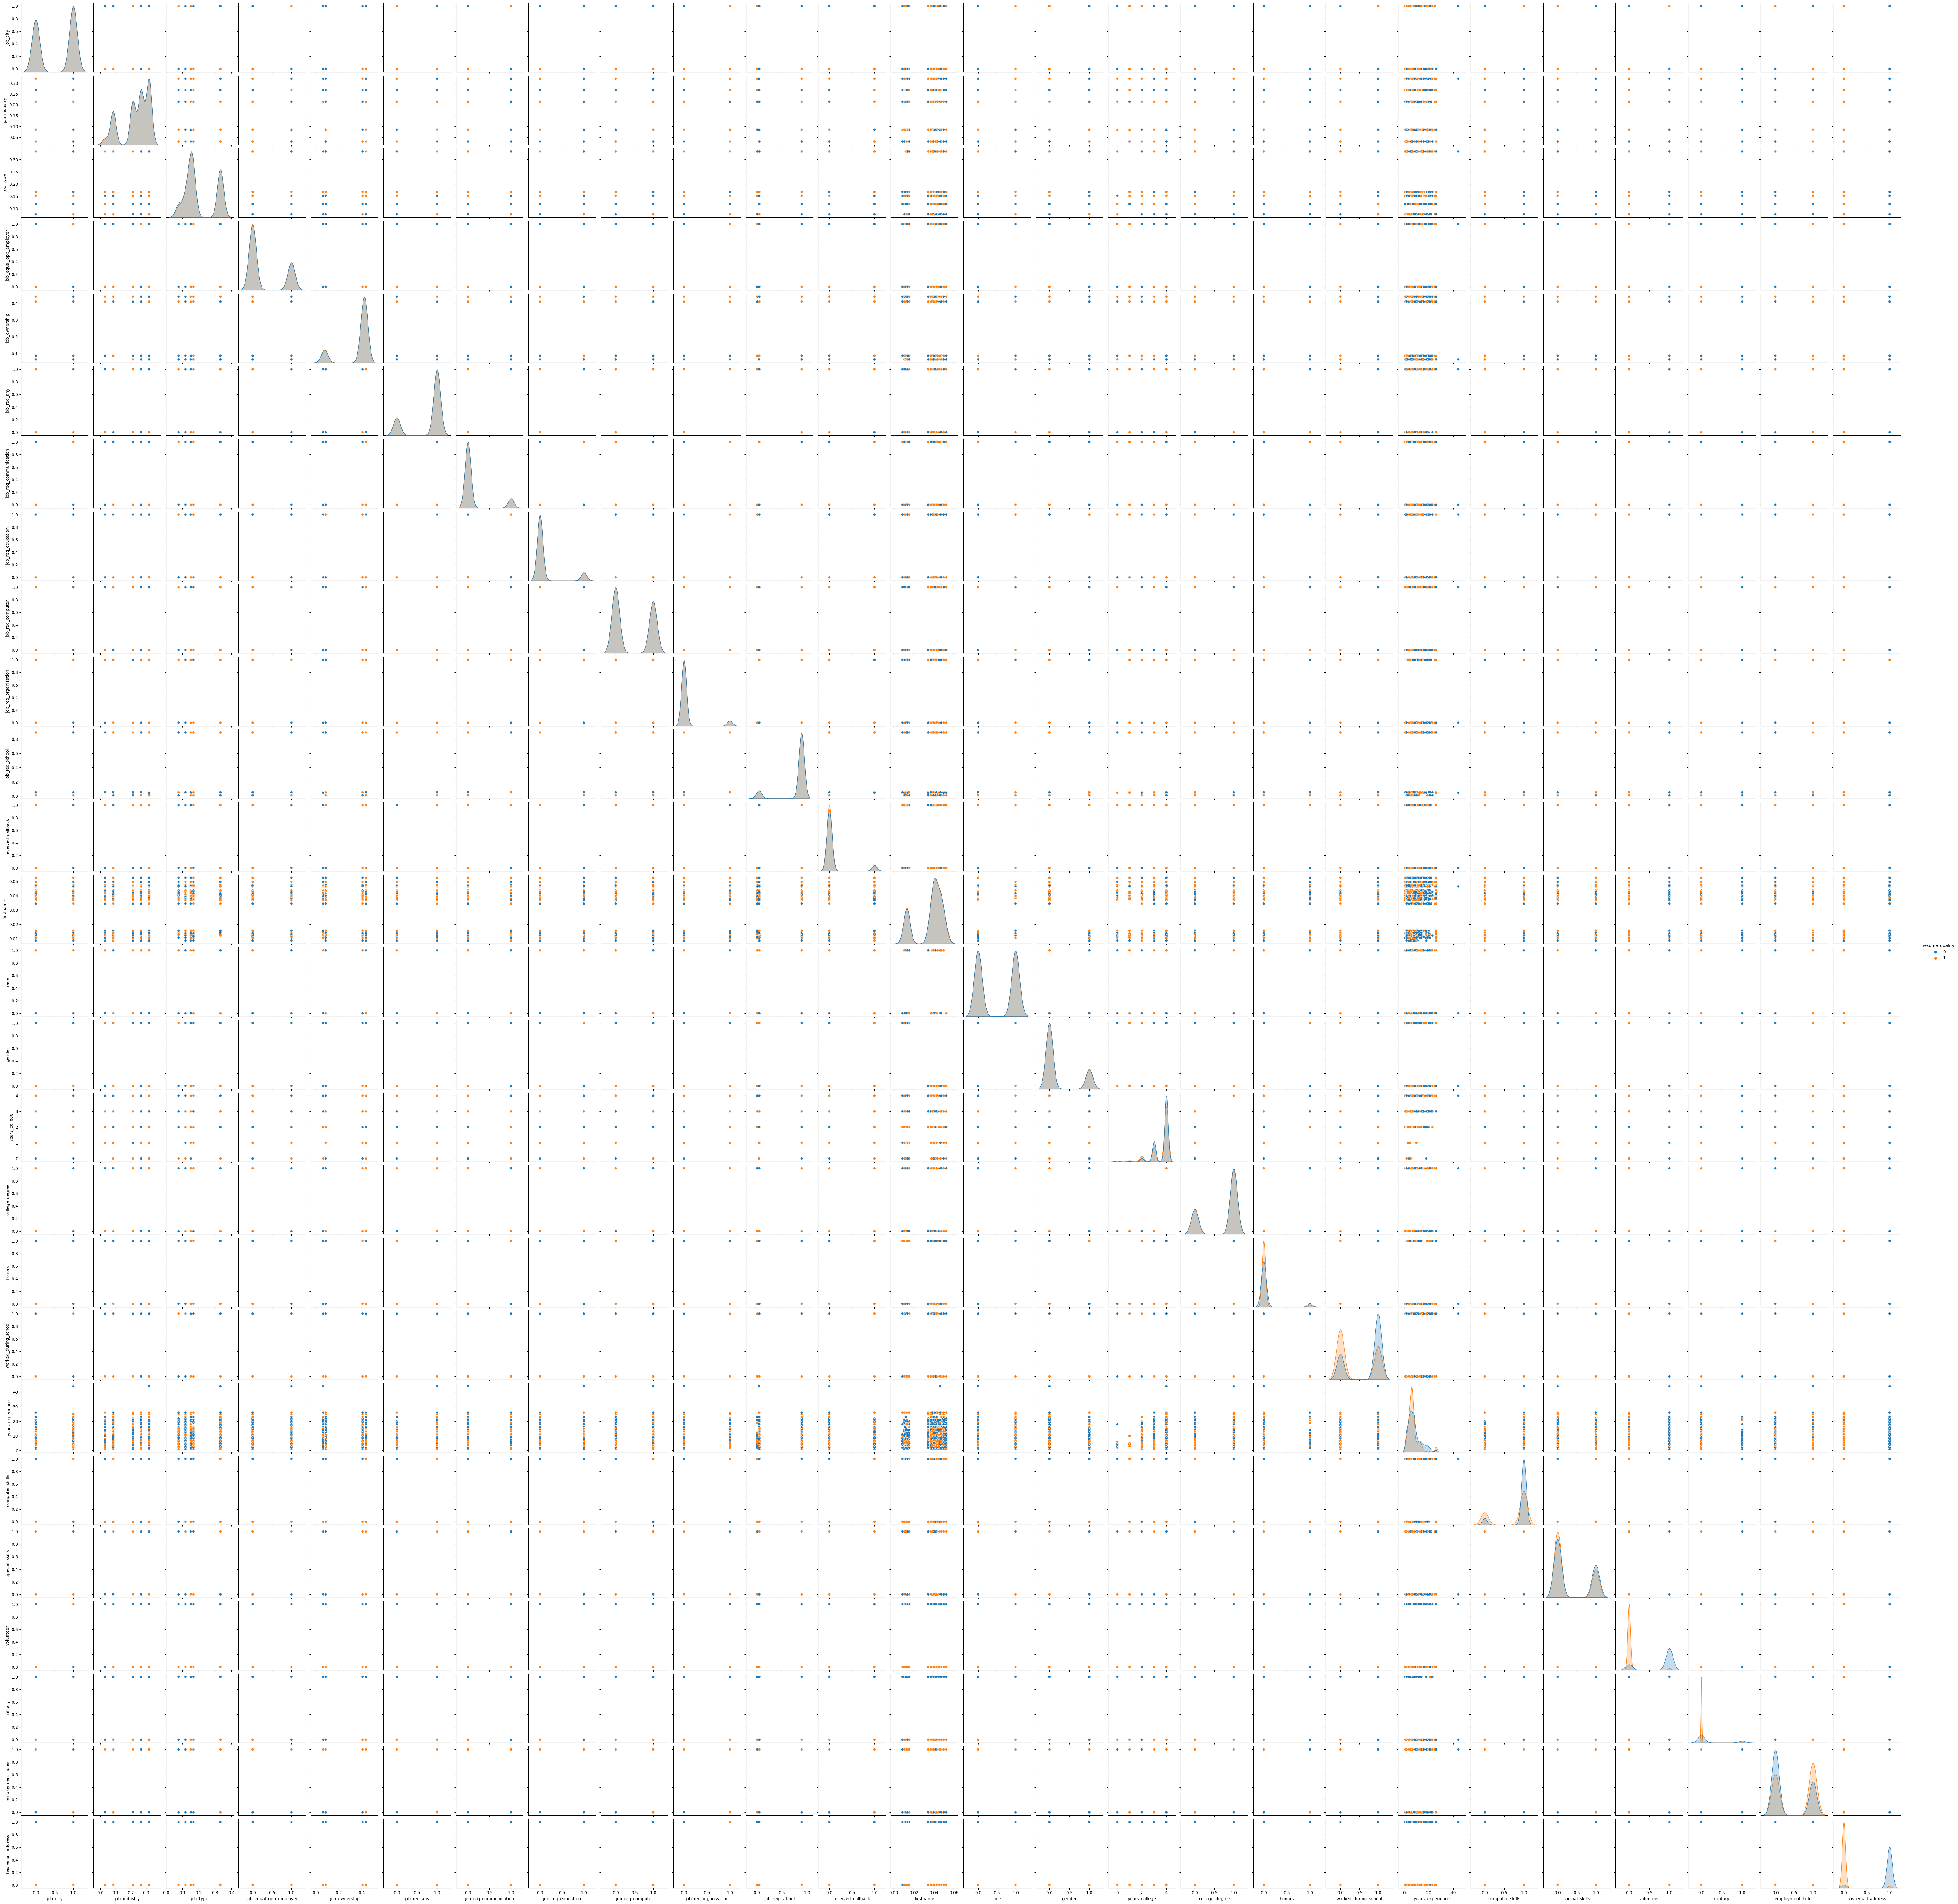

In [22]:
# Pair plot
sns.pairplot(resume_data_drop_null, hue='resume_quality')
plt.show()

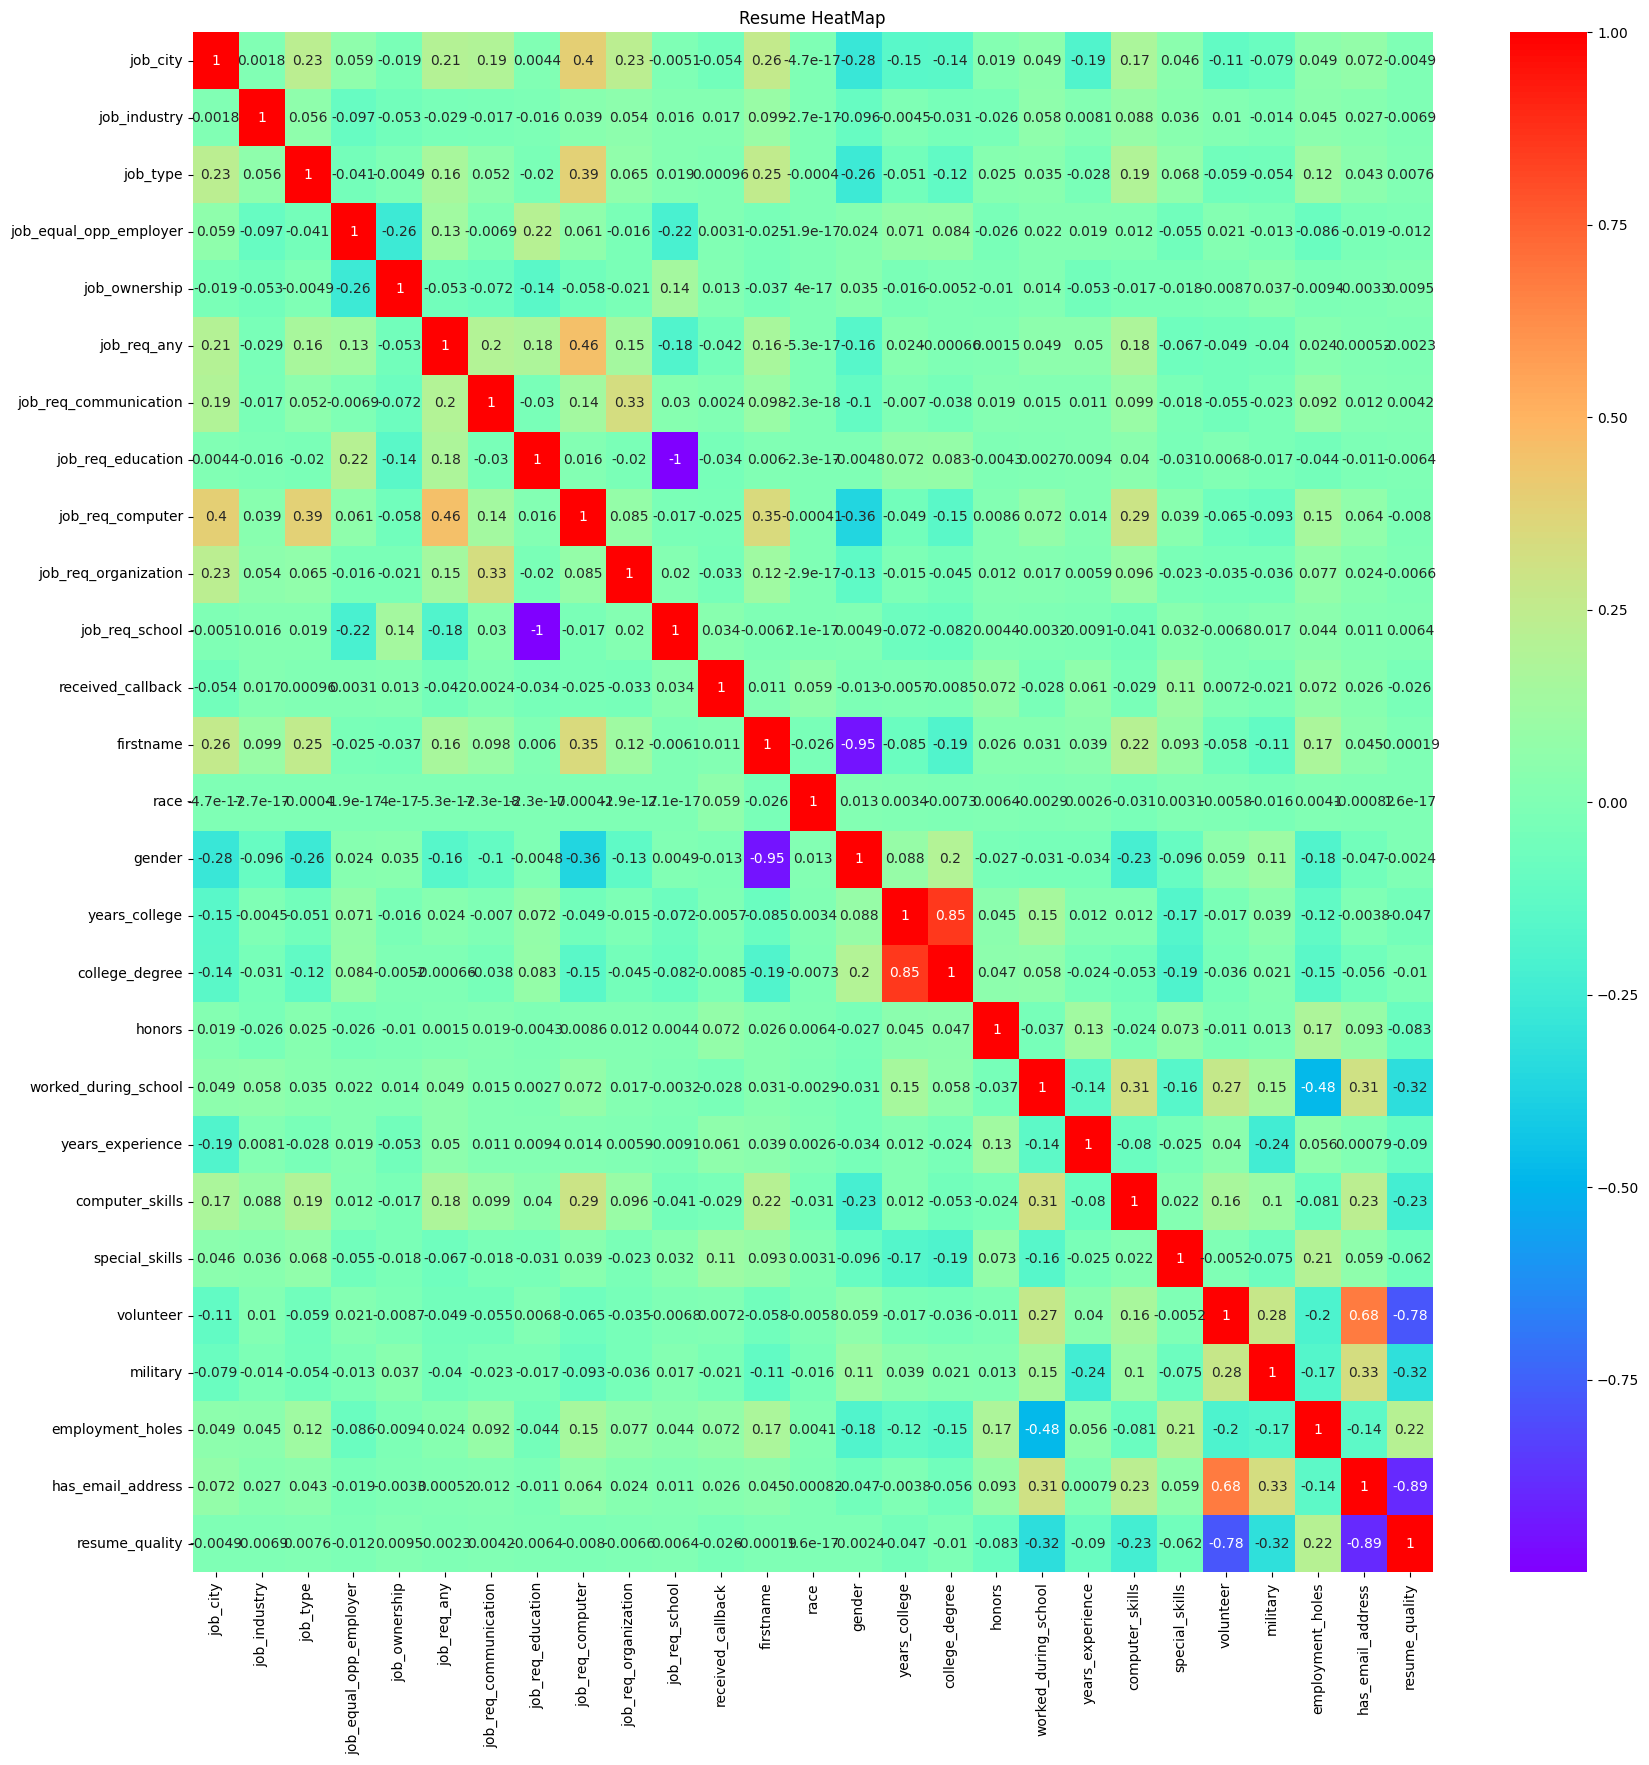

In [23]:
# Heat map
corr = resume_data_drop_null.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.title('Resume HeatMap')
plt.show()

## Split data into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
resume_data_drop_null

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,0,0,0,1,0,1
1,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,1,1,0,1,0
2,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,1,6,1,0,0,0,0,0,1
3,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,6,1,1,1,0,1,1,0
4,1,0.319918,0.332854,1,0.065298,1,0,0,1,1,...,0,1,22,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,0.085010,0.332854,0,0.438193,1,0,0,1,0,...,0,0,1,1,1,0,0,1,0,1
4866,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,0,1,6,1,0,0,0,0,0,1
4867,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,0,1,8,1,0,1,0,0,1,0
4868,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,0,1,2,1,0,1,1,0,1,0


In [27]:
X = resume_data_drop_null.iloc[:, :-1]

In [28]:
X

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
0,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,1,0,0,6,1,0,0,0,1,0
1,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,1,6,1,0,1,1,0,1
2,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,1,0,1,6,1,0,0,0,0,0
3,1,0.082957,0.077207,1,0.409035,1,0,0,1,0,...,0,0,0,6,1,1,1,0,1,1
4,1,0.319918,0.332854,1,0.065298,1,0,0,1,1,...,0,0,1,22,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,0.085010,0.332854,0,0.438193,1,0,0,1,0,...,0,0,0,1,1,1,0,0,1,0
4866,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,6,1,0,0,0,0,0
4867,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,8,1,0,1,0,0,1
4868,0,0.319918,0.152156,0,0.409035,0,0,0,0,0,...,1,0,1,2,1,0,1,1,0,1


In [29]:
y = resume_data_drop_null.iloc[:, -1:]

In [30]:
y

,resume_quality
0,1
1,0
2,1
3,0
4,0
...,...
4865,1
4866,1
4867,0
4868,0


In [31]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Predict resume quality using decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
DecisionTree = DecisionTreeClassifier()

In [34]:
# train decision tree
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# visualize decision tree as text
decision_tree_text_representation = tree.export_text(DecisionTree)
print(decision_tree_text_representation)

|--- feature_25 <= 0.50
|   |--- feature_22 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_24 <= 0.50
|   |   |   |   |--- feature_19 <= 6.50
|   |   |   |   |   |--- feature_15 <= 2.50
|   |   |   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.25
|   |   |   |   |   |   |   |--- feature_19 <= 4.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.42
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  0.42
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_12 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_19 >  4.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_15 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_19 >  6.50


## Prediction

In [59]:
y_pred = DecisionTree.predict(X_test)

In [60]:
X_test

,job_city,job_industry,job_type,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,...,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
1654,0,0.319918,0.167967,0,0.409035,1,1,0,1,0,...,1,0,1,2,1,0,1,1,0,1
1101,1,0.319918,0.332854,0,0.409035,1,0,0,1,0,...,1,0,1,6,1,1,1,0,1,1
1149,0,0.267762,0.151129,1,0.438193,1,0,0,0,0,...,0,1,0,8,0,0,0,0,1,0
2763,1,0.085010,0.332854,0,0.438193,1,0,0,1,0,...,0,0,0,6,1,0,0,0,0,0
3145,0,0.213963,0.152156,0,0.438193,1,0,0,0,0,...,1,0,1,14,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0,0.319918,0.077207,0,0.409035,1,0,0,0,0,...,0,0,1,7,1,1,0,0,1,0
1510,1,0.319918,0.332854,0,0.409035,1,0,0,1,0,...,1,0,1,6,1,0,0,0,1,0
3418,1,0.082957,0.332854,0,0.409035,1,0,1,1,0,...,0,0,0,6,1,0,0,0,0,0
680,1,0.213963,0.077207,1,0.438193,1,0,0,0,0,...,0,0,0,21,1,1,1,0,1,1


In [61]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [62]:
y_test

,resume_quality
1654,0
1101,0
1149,1
2763,1
3145,0
...,...
2231,1
1510,1
3418,1
680,0


## Evaluate Model

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       468
           1       0.99      0.98      0.98       506

    accuracy                           0.98       974
   macro avg       0.98      0.98      0.98       974
weighted avg       0.98      0.98      0.98       974



In [64]:
print(accuracy_score(y_test, y_pred))

0.9835728952772074


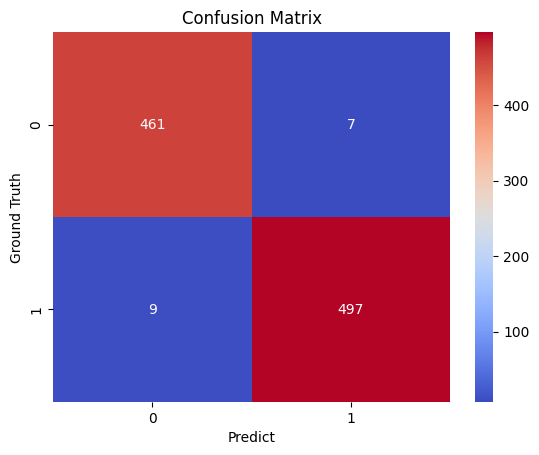

In [66]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Ground Truth')
plt.show()